# String 

## 27. Remove Element 
[27. Remove Element](https://leetcode.com/problems/remove-element/)

Two pointers (same direction):
- [0, i): being processed 
- [i, j): garbage area 
- [j, n-1]: unexplored 

Define the meaning of each pointer. Ensure the correctness of initialization and each step of the algorithm. 

In [1]:
class Solution:
    def removeElement(self, nums, val) -> int:  
        if not nums or len(nums) == 0: 
            return 0 
        
        i = j = 0  
        n = len(nums)
        while j != n: 
            # case 1: delete 
            if nums[j] == val: 
                j += 1 
            else: 
                nums[i] = nums[j] 
                i += 1 
                j += 1 
        
        return i
    

#### two pointers and three regions 
    - [0, i):numbers to be kept 
    - [i, j]: unexplored numbers 
    - (j, n-1]: numbers to be removed  


In [1]:
class Solution:
    def removeElement(self, nums, val: int) -> int:  
        if not nums or len(nums) == 0: 
            return 0 
        
        n = len(nums) 
        # initially, i = 0, j = n-1, because [i, j] is unexplored area. 
        i = 0 
        j = n - 1 
        while i <= j:
            
            if nums[i] == val: 
                # if current element i is the number to be removed, we swap nums[i] and nums[j]. 
                nums[i], nums[j] = nums[j], nums[i] 
                # After swaping, new nums[i] is still unexplored and new nums[j] is to be removed. 
                # Thus, to maintain the meaning of i and j, we need to decrement j by 1 and keep i 
                j -= 1 
            else: 
                # if nums[i] is to be kept, 
                i += 1 

        return i


## 283. Move Zeroes 
[283. Move Zeroes](https://leetcode.com/problems/move-zeroes/)

## 26. Remove Duplicates from Sorted Array 
[26. Remove Duplicates from Sorted Array](https://leetcode.com/problems/remove-duplicates-from-sorted-array/)

In [2]:
class Solution:
    def removeDuplicates(self, nums) -> int:
        if len(nums) <= 1: 
            return 
        
        i = j = 1
        n = len(nums) 
        while j != n: 
            if nums[j] == nums[i-1]: 
                j += 1 
            else: 
                nums[i] = nums[j]
                i += 1
                j += 1 
        return i 

## 80. Remove Duplicates from Sorted Array II
[80. Remove Duplicates from Sorted Array II](https://leetcode.com/problems/remove-duplicates-from-sorted-array-ii/)

In [3]:
class Solution:
    def removeDuplicates(self, nums) -> int:
        if len(nums) <= 2: 
            return len(nums) 
        
        n = len(nums) 
        i = j = 2 
        
        while j != n: 
            if nums[j] == nums[i-2]: 
                j += 1 
            else: 
                nums[i] = nums[j]
                j += 1 
                i += 1 
        
        return i 

## 1047. Remove All Adjacent Duplicates In String
[1047. Remove All Adjacent Duplicates In String](https://leetcode.com/problems/remove-all-adjacent-duplicates-in-string/)

Two pointers solution: 

Notice: if i, j are initialized as 1, then it will fail for 
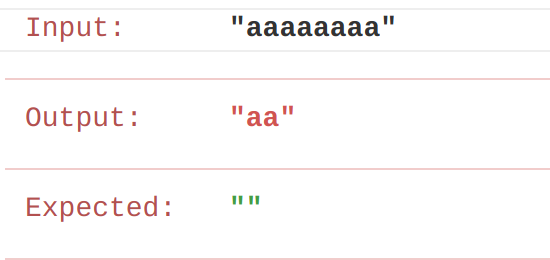

In [1]:
class Solution:
    def removeDuplicates(self, s: str) -> str: 
        """
        two pointers solution 
        """ 
        if len(s) <= 1: 
            return s 
        
        n = len(s)  
        a = list(s) 
        # print(s_list) 
        i = j = 0  
        while j != n: 
            if i == 0 or a[j] != a[i-1]: 
                # keep 
                a[i] = a[j] 
                i += 1 
                j += 1 
            else: 
                # remove 
                i -= 1 
                j += 1 
        return ''.join(a[:i]) 

Stack solution: 

In [9]:
from collections import deque 
# stack solution 
class Solution:
    def removeDuplicates(self, s: str) -> str:
        if len(s) <= 1: 
            return s 
        
        i = 1 
        
        stack = deque([s[0]]) 
        
        while i != len(s): 
            if len(stack) >= 1 and s[i] == stack[-1]: 
                stack.pop() 
            else: 
                stack.append(s[i]) 
            i += 1 
        return ''.join(list(stack)) 


## 1209. Remove All Adjacent Duplicates in String II
[1209. Remove All Adjacent Duplicates in String II](https://leetcode.com/problems/remove-all-adjacent-duplicates-in-string-ii/) 

Two pointers 
        
        """
        three pointers, four region. 
        i, j', j. 
        [0, i): processed and to be kept 
        [i, j): garbage area 
        [j, j'): repeated sequence 
        [j', n-1]: unexplored 
        
        d e e e d b b c c c b d a a
        i  
        j 
          j'
          
        """
        

In [10]:
# Runtime: 219 ms, faster than 30.33%
class Solution:
    def removeDuplicates(self, s: str, k: int) -> str:
        if len(s) < k or len(s) <= 1: 
            return s 
        
        n = len(s) 
        
        # fixme: push the first k - 1 elements 
        stack_count = deque([1])  
        stack_res = deque([s[0]])  
        i = 1 
        # i = k # fixme: check 
        while i != n: 
            if len(stack_count) == 0: 
                stack_count.append(1) 
                stack_res.append(s[i])
            
            elif s[i] != stack_res[-1]: 
                stack_count.append(1) 
                stack_res.append(s[i])
            elif s[i] == stack_res[-1] and stack_count[-1] + 1 < k: 
                stack_res.append(s[i]) 
                stack_count[-1] += 1 
                 
            else:
                stack_count.pop()  
                for _ in range(k-1):
                    if stack_res: 
                        stack_res.pop()
                
            i += 1 
        
        return ''.join(list(stack_res)) 
            
        

In [ ]:
# Runtime: 219 ms, faster than 10.33%

class Solution:
    def removeDuplicates(self, s: str, k: int) -> str:
        if len(s) < k or len(s) <= 1: 
            return s 
        
        n = len(s) 
        
        # fixme: push the first k - 1 elements 
        stack_count = deque([1])  
#         stack_res = deque([s[0]])  
        stack_res = [] 
        stack_res.append(s[0]) 
        s_list = list(s) 
        i = 1 
        # i = k # fixme: check 
        while i != n: 
            if len(stack_count) == 0: 
                stack_count.append(1) 
                stack_res.append(s_list[i])
            
            elif s_list[i] != stack_res[-1]: 
                stack_count.append(1) 
                stack_res.append(s_list[i])
            elif s[i] == stack_res[-1] and stack_count[-1] + 1 < k: 
                stack_res.append(s_list[i]) 
                stack_count[-1] += 1 
                 
            else:
                stack_count.pop()  
                for _ in range(k-1):
                    if stack_res: 
                        stack_res.pop()
                
            i += 1 
        
        return ''.join(list(stack_res)) 
            
        

In [ ]:
# Runtime: 163 ms, faster than 50.60%
class Solution:
    def removeDuplicates(self, s: str, k: int) -> str:
        if len(s) < k or len(s) <= 1: 
            return s 
        
        n = len(s) 
        
        # fixme: push the first k - 1 elements 
        stack_count = deque([1])  
        # stack_res = deque([s[0]])  
        stack_res = [] 
        stack_res.append(s[0]) 
        s_list = list(s) 
        i = 1 
        # i = k # fixme: check 
        while i != n: 
            if len(stack_count) == 0: 
                stack_count.append(1) 
                stack_res.append(s_list[i])
            
            elif s_list[i] != stack_res[-1]: 
                stack_count.append(1) 
                stack_res.append(s_list[i])
            elif s[i] == stack_res[-1] and stack_count[-1] + 1 < k: 
                stack_res.append(s_list[i]) 
                stack_count[-1] += 1 
                 
            else:
                stack_count.pop()  
                # pop_num = k - 1 
                del stack_res[-(k-1):]
            i += 1 
        
        return ''.join(list(stack_res)) 
            
        

In [23]:
languages = ['Python', 'Java', 'C++', 'Ruby', 'C']

from collections import deque 
languages = deque(languages)
print(languages)
# del languages[-3:]
# remove and return the last item
# print('When index is not passed:') 
# print('Return Value:', languages.pop())

deque(['Python', 'Java', 'C++', 'Ruby', 'C'])
When index is not passed:
Return Value: C


In [24]:
languages = ['Python', 'Java', 'C++', 'Ruby', 'C']
print('original languages:', languages) 
del languages[-3:] 
print('delete the last 3 elements:', languages)



original languages: ['Python', 'Java', 'C++', 'Ruby', 'C']
delete the last 3 elements: ['Python', 'Java']


## 28. Implement strStr() 
[28. Implement strStr()](https://leetcode.com/problems/implement-strstr/) 

In [ ]:
class Solution:
    def strStr(self, haystack: str, needle: str) -> int: 
        if len(haystack) < len(needle): 
            return -1 
        
        for i in range(len(haystack) - len(needle) + 1):
            match = True 
            for j in range(len(needle)): 
                if haystack[i+j] != needle[j]: 
                    match = False 
            if match == True: 
                return i
        
        return -1  

## 344. Reverse String 
[344. Reverse String](https://leetcode.com/problems/reverse-string/) 

In [8]:
class Solution:
    def reverseString(self, s) -> None:
        """
        Do not return anything, modify s in-place instead.
        """
        n = len(s) 
        self.helper(s, 0, n - 1) 
        
    def helper(self, s, i, j): 
        # base case 
        if i >= j: 
            return 
        s[i], s[j] = s[j], s[i] 
        self.helper(s, i+1, j-1) 

## 151. Reverse Words in a String
[151. Reverse Words in a String](https://leetcode.com/problems/reverse-words-in-a-string/) 

In [20]:
class Solution:
    def reverseWords(self, s: str) -> str:
        # preprocess and reverse 
        s = list(" ".join(s.split())) 
        # print(s) 
        
        start = 0 
        end = 0 
        while end < len(s): # 
            while end < len(s) and s[end] != ' ':  #  
                end += 1 
            self.reverse_single(s, start, end-1) 
            start = end + 1 
            end = start 
        
        self.reverse_single(s, 0, len(s) - 1) 
        
        return ''.join(s) 
        
    def reverse_single(self, s, start, end): 
        n = len(s) 
        i = start
        j = end 
        while i < j: 
            s[i], s[j] = s[j], s[i] 
            i += 1 
            j -= 1  
        

In [11]:
s = "  the sky  is blue"
# s_list = list(s) 
s = list(" ".join(s.split()))[::-1]
s

['e', 'u', 'l', 'b', ' ', 's', 'i', ' ', 'y', 'k', 's', ' ', 'e', 'h', 't']

In [19]:
s = "  the sky  is blue"
s_list = s.split()
print(s_list)
# s_list_join = ' '.join(s_list) 
# list(s_list_join) 

['the', 'sky', 'is', 'blue']


## 186. Reverse Words in a String II 
[186. Reverse Words in a String II](https://leetcode.com/problems/reverse-words-in-a-string-ii/)

In [22]:
class Solution:
    def reverseWords(self, s) -> None:
        """
        Do not return anything, modify s in-place instead.
        """
        # reverse the whole list 
        n = len(s) 
        self.reverse(s, 0, n - 1) 
        
        start = 0 
        end = 0 
        # reverse each word 
        while end < n: 
            while end < n and s[end] != ' ': 
                end += 1 
            self.reverse(s, start, end - 1) 
            
            start = end + 1 
            end = start 
        
    def reverse(self, s, start, end): 
        while start < end: 
            s[start], s[end] = s[end], s[start] 
            start += 1 
            end -= 1 

## 189. Rotate Array 
[189. Rotate Array](https://leetcode.com/problems/rotate-array/) 

In [21]:
class Solution:
    def rotate(self, nums, k: int) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """ 
        if len(nums) <= 1: 
            return nums 
        
        n = len(nums) 
        idx_partition = n - k % n 
        # print(idx_partition)  
        # [0, idx_parttion0]  
        self.reverse(nums, 0, idx_partition-1) 
        self.reverse(nums, idx_partition, n-1) 
        self.reverse(nums, 0, n-1) 

        
    def reverse(self, nums, start, end): 
        while start < end: 
            nums[start], nums[end] = nums[end], nums[start] 
            start += 1 
            end -= 1 

## 125. Valid Palindrome 
[125. Valid Palindrome](https://leetcode.com/problems/valid-palindrome/) 

In [23]:
class Solution:
    def isPalindrome(self, s: str) -> bool: 
        
        n = len(s) 
        
        i = 0 
        j = n - 1 
        
        while i < j: 
            # move i and j to a letter or number 
            while i < j and not s[i].isalnum(): 
                i += 1 
            while i < j and not s[j].isalnum():
                j -= 1 
            
            if s[i].lower() != s[j].lower():
                return False
            
            i += 1
            j -= 1
        
        return True 

## 443. String Compression
[443. String Compression](https://leetcode.com/problems/string-compression/) 

In [1]:
class Solution:
    def compress(self, chars) -> int:
        """
        [0, i): processed and kept 
        [i, j): garbage 
        j: processing 
        [j, j'): current chunk 
        a 2 a b b b  c c c  d e 
        i 
        j 
              j' 
        
        """
        
        if len(chars) == 1: 
            return 1 
        
        n = len(chars) 
        i = 0 
        j = 0 
        jp = 0
        
        while j < n: 
            # move j' to next different 
            while jp < n and chars[jp] == chars[j]: 
                jp += 1 
            count = jp - j 
            
#             chars[i] = chars[j] 
#             i += 1 
#             if count > 1: 
#                 # chars[i] = str(count) 
#                 for s in str(count): 
#                     chars[i] = s
#                     i += 1 
            
#             j = jp 
            
            if count == 1: 
                chars[i] = chars[j] 
                i += 1 
                j = jp 
                # j += 1 
            else: 
                chars[i] = chars[j] 
                i += 1 
                for s in str(count): 
                    chars[i] = s
                    i += 1 
                
                # chars[i+1] = str(count) # fixme split to single digit string 
                
                j = jp 
                # i += 2 
        return i 

# Sliding window 

## 3. Longest Substring Without Repeating Characters 
[3. Longest Substring Without Repeating Characters](https://leetcode.com/problems/longest-substring-without-repeating-characters/) 

### fix right  

In [22]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int: 
        n = len(s)
        if len(s) <= 1: 
            return len(s) 
        
        l = 0 
        res = 1 
        hashset = set() 
        for r in range(n): 
            # if invalid, make it valid. 
            while s[r] in hashset: 
                hashset.remove(s[l]) 
                l += 1 
            
            hashset.add(s[r]) 
            res = max(res, r - l + 1)
        
        return res 
    

In [1]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        """
        sliding window: 
        i: start index 
        j: end index 
        
        set: letters in [i, j] 
        
        a b c a b c b b 
        i 
        j 
        
        set: {a, b, c, }
        
        """
        if len(s) <= 1: 
            return len(s) 
        
        n = len(s) 
        i = 0 
        j = 0 
        res = 0 
        hashset = set([s[0]])  
        
        while j < n - 1: 
            if s[j+1] not in hashset: 
                hashset.add(s[j+1])
                j += 1  
                res = max(res, j-i+1)
            else: 
                hashset.remove(s[i]) 
                i += 1 
        return res 


0

## 438. Find All Anagrams in a String
[438. Find All Anagrams in a String](https://leetcode.com/problems/find-all-anagrams-in-a-string/)


In [ ]:
class Solution:
    def findAnagrams(self, s: str, p: str):
        """
        i: start 
        j: end 
        [i, j]: current substring 
        
        hashmap: element: count for [i, j] 
        c b a e b a b a c d 
        i 
            j 
        
        """
        
        if len(s) < len(p): 
            return [] 
        
        # counter dict 
        p_count = Counter(p)  
        
        n = len(s)
        i = 0 
        j = len(p) - 1 
        # hashmap = {} 
        # hashmap = dict() 
        hashmap = defaultdict(int) 
        # intialize the hashmap 
        for idx in range(j + 1): 
            hashmap[s[idx]] += 1 
        res = [] 
        
        while j < n:  
            if self.is_same_map(p_count, hashmap):  
                res.append(i) 
            hashmap[s[i]] -= 1  # notice 
            i += 1 
            j += 1  
            if j < n: 
                hashmap[s[j]] += 1 
        return res 
                
    def is_same_map(self, count, hashmap): 
        for k, v in count.items(): 
            if hashmap[k] != v: 
                return False 
        return True 
        

In [5]:
# default dict 
dic = {1: 'k', 2: 'k'} 
print(dic) 
# dic[3]
ele = dic.get(3, 0) 
print(ele) 
dic[3] = dic.get(3, 0) + 1 
print(dic[3])


{1: 'k', 2: 'k'}
0
1


In [13]:
# default dict 
from collections import defaultdict 
d = defaultdict(int)  
# d = dict() 
# d = {} 
d[0] = 1 
d[1] = 1  
print(d)
print(d[4]) 




defaultdict(<class 'int'>, {0: 1, 1: 1})
0


In [17]:
import collections  
p = 'cicitttt' 
myDictP = collections.Counter(p) 
print(myDictP) 
# for i in myDictP.elements(): 
#     print(i)
print(myDictP['t'])
print(myDictP.get('t', 0))
print(myDictP.get('e', 0))

Counter({'t': 4, 'c': 2, 'i': 2})
4
4
0


## 485. Max Consecutive Ones
[485. Max Consecutive Ones](https://leetcode.com/problems/max-consecutive-ones/) 

In [18]:
class Solution:
    def findMaxConsecutiveOnes(self, nums) -> int: 
        """
        count for 1s 
        
        
        """
        
        n = len(nums)  
        count = 0 
        res = 0 
        for idx, item in enumerate(nums): 
            if item == 0: 
                count = 0 
            else: 
                count += 1 
                res = max(count, res)

        return res 
        

## 487. Max Consecutive Ones II
[487. Max Consecutive Ones II](https://leetcode.com/problems/max-consecutive-ones-ii/)

In [20]:
class Solution:
    def findMaxConsecutiveOnes(self, nums) -> int: 
        """
        sliding window: 
        [i, j]: current valid subarray 
        count: current length 
        num_zeros: # of 0s in [i, j]
        1 0 1 1 0 
        i 
          j 
        
        num_zeros 
        res = max(j-i+1, res)
        
        """ 
        
        if len(nums) <= 1: 
            return len(nums) 
        
        n = len(nums) 
        i = 0 
        j = 0  
        res = 0 
        num_zeros = 0 
        
        while j < n: 
            if nums[j] == 1: 
                count = j - i + 1
                res = max(res, count) 
            else: 
                num_zeros += 1 
                if num_zeros <= 1: 
                    count = j - i + 1
                    res = max(res, count) 
                else: 
                    # invalid 
                    while i <= j and nums[i] != 0: 
                        i += 1 
                    i += 1 
            j += 1 
                    
        return res 

## 1004. Max Consecutive Ones III
[1004. Max Consecutive Ones III](https://leetcode.com/problems/max-consecutive-ones-iii/) 

#### key to understand two pointers and sliding window 
try every start point. 

arr = [1, 1, 0, 0, 1, 1, 1

[l, r): spend all k flips. or less thank k flips. 






In [19]:
class Solution:
    def longestOnes(self, nums, k: int) -> int:
        
        if len(nums) <= k: 
            return len(nums) 
        
        n = len(nums) 
        i = 0 
        j = 0  
        res = 0
        num_zeros = 0 
        
        while j < n: 
            if nums[j] == 1: 
                count = j - i + 1
                res = max(res, count) 
            else: 
                num_zeros += 1 
                if num_zeros <= k: 
                    count = j - i + 1
                    res = max(res, count) 
                else: 
                    # invalid 
                    while i <= j and nums[i] != 0: 
                        i += 1 
                    i += 1 
            j += 1 
                    
        return res 

In [21]:
class Solution:
    def longestOnes(self, nums, k: int) -> int: 
        """
        sliding window: 
        fix left, expand right 
        
        increment left, maintain k. 
        
        """
        
        if len(nums) <= k: 
            return len(nums) 
        
        n = len(nums) 
        r = 0 
        res = 0 
        for l in range(n): 
            # expand right 
            # teminate condition: r >= n 
            # or k <= 0 
            while r < n and (nums[r] == 1 or (nums[r] == 0 and k > 0)):   
                if nums[r] == 0: 
                    k -= 1 
                r += 1 
            
            res = max(res, r - l) 
            
            if nums[l] == 0: 
                k += 1 
        return res             
        

### fix right  

In [ ]:

class Solution:
    def longestOnes(self, nums, k: int) -> int: 
        n = len(nums)
        if len(nums) <= k: 
            return len(nums) 
        
        l = 0 
        res = 0 
        for r in range(n): 
            
            if nums[r] == 0: 
                k -= 1 
                
            # if invalid, make it valid  
            if k < 0: 
                while nums[l] != 0: 
                    l += 1 
                l += 1 
                k += 1 
            
#             while l < n and k < 0: 
#                 if nums[l] == 0: 
#                     k += 1 
#                 l += 1 
            
            res = max(res, r - l + 1) 
        return res 

## 239. Sliding Window Maximum
[239. Sliding Window Maximum](https://leetcode.com/problems/sliding-window-maximum/) 

Window data structure: 
- add 
- remove 
- max 
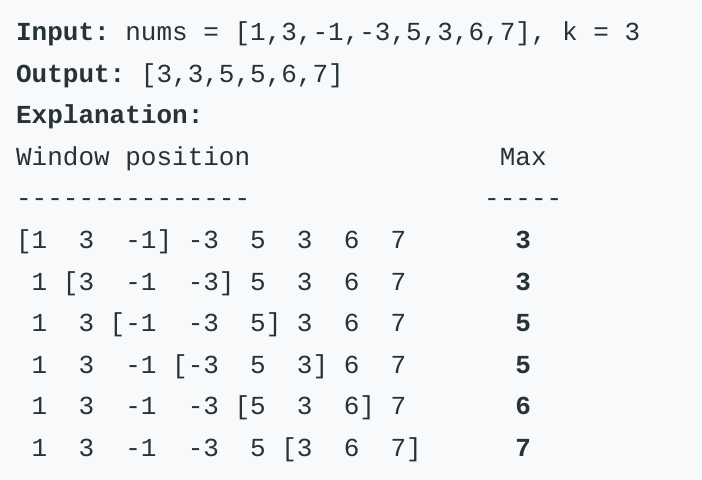


Deque: the left most element is the greatest. 

Deque information: 
- max in current window  
- potential max(s) in subsequent windows 

How we update the deque as we move the window? 
- if the max (first element in the deque) is out of the range, we remove it, and thus the second greatest element is the max in current window. 
- if the max is within the range, then it is the max, and we simply append it to the result.  
```
         window                max         deque 
[1]  3  -1  -3  5  3  6  7      1         [1]
[1   3] -1  -3  5  3  6  7      3         [3]
[1   3  -1] -3  5  3  6  7      3         [3, -1]  # -1 is the potintial max 
1   [3  -1  -3]  5  3  6  7      3         [3, -1, -3] 
1    3  [-1  -3  5]  3  6  7      3        [5] 
1    3  -1  [-3  5  3]  6  7      3        [5, 3]  
1    3  -1  -3  [5  3  6]  7      3        [6]  


```





Another example: 

```
[1    3  -1]  3  2  1  1  7      3        [3, -1]   
1    [3  -1  3]  2  1  1  7      3        [3, -1]  
1    3  -1  3  [2  1  1]  7      3        [6]  

```

In [23]:
class Solution:
    def maxSlidingWindow(self, nums, k: int):
        n = len(nums) 
        window_size = n - k + 1 
        res = [0 for _ in range(window_size)] 
        q = deque() 
        
        for idx, item in enumerate(nums): 
            # update q: check if current max is out of range  
            left_boundry = idx - k + 1
            if q and q[0] < left_boundry: 
                q.popleft() 
            # update q: push new element to q. 
            # note: potential max for subsequent windows, order? 
            while q and nums[q[-1]] <= item:  # note has to be <= 
            # while q and nums[q[-1]] < item:  # note has to be <= 
                q.pop()  
            q.append(idx) 
            
            # append max to result 
            if idx >= k - 1: 
                res[idx - k + 1] = nums[q[0]]   # note append the element rather than the index 
        
        return res 
        

## 295. Find Median from Data Stream
[295. Find Median from Data Stream](https://leetcode.com/problems/find-median-from-data-stream/) 

### Naive approach 

In [24]:
class MedianFinder:

    def __init__(self):
        self.data = []  
        self.length = 0 
        

    def addNum(self, num: int) -> None: 
        self.data.append(num) 
        self.length = len(self.data)
        

    def findMedian(self) -> float:
        self.data.sort() 
        if self.length % 2 == 0: 
            median_idx_1 = self.length // 2 
            median_idx_2 = median_idx_1 - 1  
            res = self.data[median_idx_1] + self.data[median_idx_2]
            return res / 2 
        else: 
            median_idx = (self.length - 1) // 2 
            return self.data[median_idx]



## 480. Sliding Window Median
[480. Sliding Window Median](https://leetcode.com/problems/sliding-window-median/) 

Is there a data-structure out there that we can use (in one or more quantities) to obtain the median element extremely fast, say O(1) time while having the ability to perform the other operations fairly efficiently as well?



## 76. Minimum Window Substring
[76. Minimum Window Substring](https://leetcode.com/problems/minimum-window-substring/)

## 424. Longest Repeating Character Replacement 
[424. Longest Repeating Character Replacement](https://leetcode.com/problems/longest-repeating-character-replacement/) 

## 42. Trapping Rain Water
[42. Trapping Rain Water](https://leetcode.com/problems/trapping-rain-water/)

## 407. Trapping Rain Water II 
[407. Trapping Rain Water II ](https://leetcode.com/problems/trapping-rain-water-ii/)

## 84. Largest Rectangle in Histogram 
[84. Largest Rectangle in Histogram](https://leetcode.com/problems/largest-rectangle-in-histogram/)